# Jupyter Notebook Purpose
- read the .csv.gz compressed file dataset into pandas DataFrame and perform analyses and visualizations on the dataset
    - explore dataset features and labels to find trends that Toronto Fire Services (TFS) Basic Incidents follow.

## Group 10 Members

- ### A. Nidhi Punja - [Email](mailto:npunja@uwaterloo.ca)
- ### B. Judith Roth - [Email](mailto:j5roth@uwaterloo.ca)
- ### C. Iman Dordizadeh Basirabad - [Email](mailto:idordiza@uwaterloo.ca)
- ### D. Daniel Adam Cebula - [Email](mailto:dacebula@uwaterloo.ca)
- ### E. Cynthia Fung - [Email](mailto:c27fung@uwaterloo.ca)
- ### F. Ben Klassen - [Email](mailto:b6klasse@uwaterloo.ca)

In [1]:
# Group 10 Collaborators
COLLABORATORS = ["Nidhi Punja",
                 "Judith Roth",
                 "Iman Dordizadeh Basirabad",
                 "Daniel Adam Cebula",
                 "Cynthia Fung",
                 "Ben Klassen"]

# Group 10 Members
for _ in COLLABORATORS:
    print(f"Group 10 Member: {_:->30}")

Group 10 Member: -------------------Nidhi Punja
Group 10 Member: -------------------Judith Roth
Group 10 Member: -----Iman Dordizadeh Basirabad
Group 10 Member: ------------Daniel Adam Cebula
Group 10 Member: ------------------Cynthia Fung
Group 10 Member: -------------------Ben Klassen


# Table of Contents

## 1. [Python Dependecies](#1.-Python-Libraries-and-Dependencies[1,2,3,4,5,6])
___
## 2. [Folder Creation](#2.-Folder-Creation-for-Data-Analyses-and-Visualization)
___
## 3. [Read in the Data](#3.-Read-in-DataSet-as-a-Pandas-DataFrame)
___
## 4. [Toronto Fire Services (TFS) Incident Types](#4.-Toronto-Fire-Services-(TFS)-Incident-Type-Exploration)
___
## 5. [Toronto Fire Services (TFS) Time Series](#5.-Toronto-Fire-Services-Time-Series-Exploration)
___
## 6. [Weather / Climate effect on TFS Fire Incidents](#6.-The-Effect-of-Toronto-Weather-/-Climate-on-Toronto-Fire-Services-Basic-Incidents)
___
## 7. [Time and Days of the Week effect on TFS Fire Incidents](#7.-The-effect-if-Time-and-Day-of-the-Week-on-TFS-Fire-Incidents)
___
## 8. [Call Sources on TFS Fire Incidents](#8.-Source-of-Calls-and-its-effect-on-TFS-Fire-Incidents)
___
## 9. [References](#9.-Jupyter-Notebook-References)
___

# 1. Python Libraries and Dependencies<sup>[1,2,3,4,5,6]</sup>

In [2]:
# Python Modules for Miscellaneous reasons
import os        # portable way to use operating system functionalities
import datetime  # python classes for manipulating dates and times
import dateutil  # powerful extensions to standard datetime Python module
import re        # used for Python regex library
from IPython.display import display # use this to see the entire DataFrame in the right format
from create_folder import create_folder # create folder function that I have defined and placed in create_folder.py file
import warnings  # suppress warnings from various Python libraries
import math      # import python math library for various functions
import string    # use this library to remove punctuation

In [3]:
# DATA ANALYSIS / VISUALIZATION Python Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Seaborn data visualization library based on matplotlib
import seaborn as sns

In [5]:
# some matplotlib libraries for formatting
import matplotlib.ticker as tick
import matplotlib.dates as mdates

# 2. Folder Creation for Data Analyses and Visualization
- generate a folder that will hold data analyses / visualizations

In [6]:
# get a connection to the major directory holding the data / metadata of the DataFrame
PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name="PROCESSED_ZIPPED")

# generate a images folder and a analyses folder to hold all relevant information
IMAGES_DIRECTORY = create_folder(folder_name="IMAGES")
ANALYSES_DIRECTORY = create_folder(folder_name="ANALYSES")

# get folders for fire incidents, toronto weather and fire station location data
FIRE_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "FIRE_INCIDENTS"))
WEATHER_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "TORONTO_WEATHER"))
STATIONS_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "FIRE_STATIONS"))

# 3. Read in DataSet as a Pandas DataFrame
- DataSet is a compressed file (.csv.bz2)
- DataSet Metadata is a .csv file

In [7]:
# read in the metadata from .csv into memory
# use this metatdata to explain the columns
df_metadata = pd.read_csv(
    os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "FINAL_DATASET_METADATA.csv"),
    index_col="COLUMN_NAME")

# display it
with pd.option_context('display.max_colwidth', 300):
    display(df_metadata)

,COLUMN_DESCRIPTION
COLUMN_NAME,
INCIDENT_NUM,Toronto Fire Services (TFS) incident number. Used as index for the DataFrame because it is unique for each call.
DATETIME,"Year, Month, Day, Hour, Minute, Second of when TFS was notified of the incident (alarm)."
MINUTES_ARRIVAL,Minutes it took for the first unit to arrive (after alarm).
MINUTES_LEAVE,Minutes it took for the first unit to leave (after arrival).
FIRE_STATION,Number of TFS Station where incident occurred.
FIRE_STATION_CLOSEST,Number of closest (by smallest Haversine formula distance calculation) TFS Station where incident occurred.
NAME,Name of column FIRE_STATION TFS Fire Station.
ADDRESS,Address of column FIRE_STATION TFS Fire Station.
LATITUDE_STATION,Latitude (Decimal Degrees) of column FIRE_STATION TFS Fire Station.


In [8]:
# read the merged DataFrame from .csv.bz2 file into DataFrame
PATH_MERGED_CSV_BZ2 = os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "FINAL_DATASET.csv.bz2")

# pandas DataFrame generated and is referenced by df variable name
df = pd.read_csv(PATH_MERGED_CSV_BZ2,
                 compression='bz2', index_col="INCIDENT_NUM", parse_dates=["DATETIME"])

# make the columns categorical (for faster queries)
df["CAD_TYPE"] = pd.Categorical(df["CAD_TYPE"])
df["CAD_CALL_TYPE"] = pd.Categorical(df["CAD_CALL_TYPE"])
df["FINAL_TYPE"] = pd.Categorical(df["FINAL_TYPE"])
df["CALL_SOURCE"] = pd.Categorical(df["CALL_SOURCE"])
df["NAME"] = pd.Categorical(df["NAME"])
df["ADDRESS"] = pd.Categorical(df["ADDRESS"])
df["WARD_NAME"] = pd.Categorical(df["WARD_NAME"])
df["MUN_NAME"] = pd.Categorical(df["MUN_NAME"])

# display it
with pd.option_context('display.max_columns', None):
    display(df.head())

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,MUN_NAME,CAD_TYPE,CAD_CALL_TYPE,FINAL_TYPE,ALARM_LEVEL,CALL_SOURCE,PERSONS_RESCUED,LATITUDE,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342.0,342.0,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.679099,-79.461761,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000011,2011-01-01 00:03:55,5.117,6.183,131.0,131.0,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),former Toronto,Medical,Carbon Monoxide,89 - Other Medical,1,01 - 911,0.0,43.726342,-79.396401,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000012,2011-01-01 00:05:03,4.517,17.617,324.0,324.0,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.668548,-79.335324,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000013,2011-01-01 00:04:46,6.000,9.883,345.0,345.0,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),former Toronto,FIG - Fire - Grass/Rubbish,Emergency Fire,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",1,01 - 911,0.0,43.657123,-79.434313,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000014,2011-01-01 00:06:07,4.933,10.133,142.0,142.0,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),North York,FAHR - Alarm Highrise Residential,Emergency Fire,"33 - Human - Malicious intent, prank",1,05 - Telephone from Monitoring Agency,0.0,43.759840,-79.516182,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0


# 4. Toronto Fire Services (TFS) Incident Type Exploration
- What are the majority of calls for TFS basic fire incidents?
    - 69 Total Final Incident Types
    - Top 15 are ~91% and Top 10 are ~85.5%
    - Fire is number 11

In [9]:
# lets get the total observations for each category in  "FINAL_TYPE" column
df_FINAL_TYPE = pd.DataFrame(df["FINAL_TYPE"].value_counts()
                                             .reset_index()
                                             .rename(columns={
                                                 "index":"FINAL_TYPE",
                                                 "FINAL_TYPE":"COUNT"}))

# set the index to start from 1 and set index name
df_FINAL_TYPE = df_FINAL_TYPE.set_index(np.arange(1, len(df_FINAL_TYPE)+1))
df_FINAL_TYPE.index.name = "INDEX"

# Create a "CODE" and "DESCRIPTION" column that splits the number and description from each other
df_FINAL_TYPE["CODE"] = df_FINAL_TYPE["FINAL_TYPE"].apply(lambda x: int(x.split("-")[0].strip()))
df_FINAL_TYPE["DESCRIPTION"] = df_FINAL_TYPE["FINAL_TYPE"].apply(lambda x: x.split("-")[1].strip())

# create a slice dropping FINAL_TYPE column and Reordering the rest
df_FINAL_TYPE = df_FINAL_TYPE.loc[:, ["CODE", "DESCRIPTION", "COUNT"]]

# display all the rows
with pd.option_context("display.max_rows", None):
    display(df_FINAL_TYPE)

,CODE,DESCRIPTION,COUNT
INDEX,,,
1,89,Other Medical,538573
2,32,Alarm System Equipment,56956
3,31,Alarm Equipment,51192
4,62,Vehicle Collision,49299
5,34,Human,33320
6,35,Human,25236
7,66,Persons Trapped in Elevator,21346
8,33,Human,20718
9,22,Pot on Stove (no fire),19903


In [10]:
# The top 15 Final Incident Types account for ~91% of all Basic Fire Incidents
print(f"""Top 15 Final Incident Types account for:  """ +
      f"""{(sum(df_FINAL_TYPE["COUNT"][:15]) / sum(df_FINAL_TYPE["COUNT"])):.2%}"""+
      """ of all Basic Fire Incidents.\n\n""")

# And Number 11 is Fire
display(df_FINAL_TYPE.loc[11])

# The top 10 Final Incident Types account for ~85.5% of all Basic Fire Incidents
# Toronto Fire Services might be wise to change their name to Toronto Emergency Services instead...
print(f"""\n\nTop 10 Final Incident Types account for:  """ +
      f"""{(sum(df_FINAL_TYPE["COUNT"][:10]) / sum(df_FINAL_TYPE["COUNT"])):.2%}"""+
      """ of all Basic Fire Incidents.\n\n""")

Top 15 Final Incident Types account for:  91.42% of all Basic Fire Incidents.




CODE               1
DESCRIPTION     Fire
COUNT          16206
Name: 11, dtype: object



Top 10 Final Incident Types account for:  85.53% of all Basic Fire Incidents.




In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") # suppress SetwithCopy Warnings from Pandas
    
    # generate 2 columns that provide percentage of total calls received for
    # types of calls
    df_FINAL_TYPE_15 = df_FINAL_TYPE.loc[:15]

    # Total Calls
    df_FINAL_TYPE_15["TOTAL_CALLS_RECEIVED_%"] = df_FINAL_TYPE_15["COUNT"].apply(
                            lambda x: f"{str(np.floor(np.around(x / np.sum(df_FINAL_TYPE['COUNT']), decimals=2) * 100))}%"
                                                                                 )
    # Top 15 Calls
    df_FINAL_TYPE_15["TOP_15_CALLS_RECEIVED_%"] = df_FINAL_TYPE_15["COUNT"].apply(
                            lambda x: f"{str(np.floor(np.around(x / np.sum(df_FINAL_TYPE['COUNT'][:15]), decimals=2) * 100))}%"
                                                                                 )

    display(df_FINAL_TYPE_15)

,CODE,DESCRIPTION,COUNT,TOTAL_CALLS_RECEIVED_%,TOP_15_CALLS_RECEIVED_%
INDEX,,,,,
1,89,Other Medical,538573,55.0%,60.0%
2,32,Alarm System Equipment,56956,6.0%,6.0%
3,31,Alarm Equipment,51192,5.0%,6.0%
4,62,Vehicle Collision,49299,5.0%,6.0%
5,34,Human,33320,3.0%,4.0%
6,35,Human,25236,3.0%,3.0%
7,66,Persons Trapped in Elevator,21346,2.0%,2.0%
8,33,Human,20718,2.0%,2.0%
9,22,Pot on Stove (no fire),19903,2.0%,2.0%


In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") # suppress SetwithCopy Warnings from Pandas
    # append a Total Count to the Bottom
    df_FINAL_TYPE_15.loc["Total"] = df_FINAL_TYPE_15[["COUNT"]].sum()

    # Save the DataFrame to .csv file
    # Save the DataFrame to a .csv file
    df_FINAL_TYPE_15.to_csv(os.path.join(ANALYSES_DIRECTORY, "TFS_Final_Incident_Types.csv"))

    display(df_FINAL_TYPE_15)

,CODE,DESCRIPTION,COUNT,TOTAL_CALLS_RECEIVED_%,TOP_15_CALLS_RECEIVED_%
INDEX,,,,,
1,89,Other Medical,538573.0,55.0%,60.0%
2,32,Alarm System Equipment,56956.0,6.0%,6.0%
3,31,Alarm Equipment,51192.0,5.0%,6.0%
4,62,Vehicle Collision,49299.0,5.0%,6.0%
5,34,Human,33320.0,3.0%,4.0%
6,35,Human,25236.0,3.0%,3.0%
7,66,Persons Trapped in Elevator,21346.0,2.0%,2.0%
8,33,Human,20718.0,2.0%,2.0%
9,22,Pot on Stove (no fire),19903.0,2.0%,2.0%


In [13]:
# free up memory
del df_FINAL_TYPE_15, df_FINAL_TYPE

# 5. Toronto Fire Services Time Series Exploration
- Data has timestamps from January 2011 to December 2018
    - lets explore how many basic fire incidents the TFS responds to on a daily / monthly basis

### Daily

In [14]:
# take a slice of the DataFrame and make a copy of the data
# since the count is take all we needs is a column with no nulls
# CAD_TYPE was chosen
df_DATETIME = df.loc[:, ["DATETIME", "CAD_TYPE"]].copy()

# set the index as the "DATETIME" column which contains the timestamps
# drop the DATETIME column as it is now the index
df_DATETIME.index = df["DATETIME"]
df_DATETIME = df_DATETIME.drop(columns="DATETIME")

# resample dailyand get the daily count of TFS Basic Fire Incidents
df_DATETIME_DAILY = df_DATETIME.resample("D").count().rename(columns={"CAD_TYPE":"COUNT"})
df_DATETIME_DAILY

,COUNT
DATETIME,
2011-01-01,530
2011-01-02,383
2011-01-03,394
2011-01-04,383
2011-01-05,391
...,...
2018-12-27,335
2018-12-28,381
2018-12-29,300


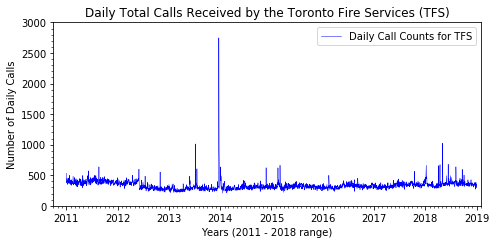

In [15]:
# visualize the resampled daily count time series with matplotlib
fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

# get y lim
y_lim1 = 0
y_lim2 = math.ceil(df_DATETIME_DAILY["COUNT"].max() / 1000) * 1000

# get x lim
x_lim1 = datetime.datetime(year=2010, month=10, day=1)
x_lim2 = datetime.datetime(year=2019, month=2, day=1)

# plot the time series
axes.plot(df_DATETIME_DAILY.index,
          df_DATETIME_DAILY["COUNT"],
          color="blue",
          linewidth=0.5,
          label="Daily Call Counts for TFS");

# set axis limits
axes.set_xlim(x_lim1, x_lim2)
axes.set_ylim(y_lim1, y_lim2)

# set minor ticks for x axis to be the months
months = mdates.MonthLocator()
axes.xaxis.set_minor_locator(months)

# set minor ticks for y axis to be values of 100
hundreds = tick.MultipleLocator(100)
axes.yaxis.set_minor_locator(hundreds)

# set title, x axis title and y axis title
axes.set_title("Daily Total Calls Received by the Toronto Fire Services (TFS)")
axes.set_xlabel("Years (2011 - 2018 range)")
axes.set_ylabel("Number of Daily Calls")

# plot a legend
plt.legend()

# magical padding
plt.tight_layout()

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "Daily_Total_Calls_TFS.png"))

In [16]:
# There appears to be a maximum (outlier?) in December 22 2013
df_DATETIME_DAILY.loc[df_DATETIME_DAILY["COUNT"] == df_DATETIME_DAILY["COUNT"].max()]

,COUNT
DATETIME,
2013-12-22,2747


#### December 22, 2013 historically according to the National Post<sup>[7]</sup> was a nasty ice storm that left 300,000 people in Toronto Isolated
- this was an unprecedented event
- lets slice out this event and observe the time series plot again

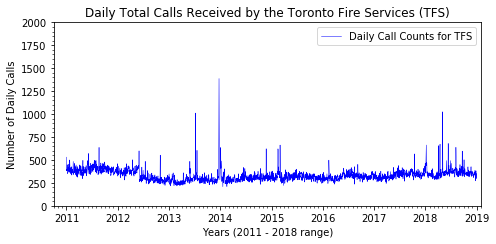

In [17]:
# use ~ NOT boolean operator to slice out the outlier
df_DATETIME_DAILY = df_DATETIME_DAILY.loc[~(df_DATETIME_DAILY["COUNT"] == df_DATETIME_DAILY["COUNT"].max())]

# visualize the resampled daily count time series with matplotlib
fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

# get y lim
y_lim1 = 0
y_lim2 = math.ceil(df_DATETIME_DAILY["COUNT"].max() / 1000) * 1000

# get x lim
x_lim1 = datetime.datetime(year=2010, month=10, day=1)
x_lim2 = datetime.datetime(year=2019, month=2, day=1)

# plot the time series
axes.plot(df_DATETIME_DAILY.index,
          df_DATETIME_DAILY["COUNT"],
          color="blue",
          linewidth=0.5,
          label="Daily Call Counts for TFS");

# set axis limits
axes.set_xlim(x_lim1, x_lim2)
axes.set_ylim(y_lim1, y_lim2)

# set minor ticks for x axis to be the months
months = mdates.MonthLocator()
axes.xaxis.set_minor_locator(months)

# set minor ticks for y axis to be values of 100
fifties = tick.MultipleLocator(50)
axes.yaxis.set_minor_locator(fifties)

# set title, x axis title and y axis title
axes.set_title("Daily Total Calls Received by the Toronto Fire Services (TFS)")
axes.set_xlabel("Years (2011 - 2018 range)")
axes.set_ylabel("Number of Daily Calls")

# plot a legend
plt.legend()

# magical padding
plt.tight_layout()

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "Daily_Total_Calls_TFS_REMOVED_12-22-2013.png"))

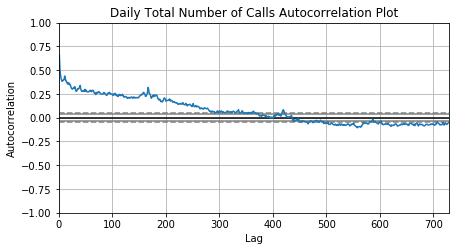

In [18]:
# lets get the autocorrelation plot to see if there is a relationship
# between successive days
fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

# get x lim (lets stop at 2 years 365)
x_lim1 = 0
x_lim2 = 730

# get the y lim
y_lim1 = -1
y_lim2 = 1

# autocorrelation plot
pd.plotting.autocorrelation_plot(df_DATETIME_DAILY, ax=axes)

# set the x and y limits
axes.set_xlim(x_lim1, x_lim2)
axes.set_ylim(y_lim1, y_lim2)
axes.set_title("Daily Total Number of Calls Autocorrelation Plot")

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "Daily_Total_Calls_Autocorrelation.png"))

# It appears for about 300 days that there are strong correlations of Fire Incidents with each other

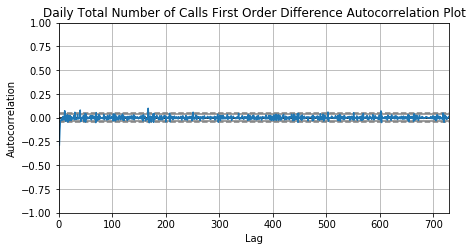

In [19]:
# lets take the first order difference to see if we can introduce
# stationarity to the time series
df_DATETIME_DAILY_DIFF = df_DATETIME_DAILY.diff(1).dropna()

# lets get the autocorrelation plot to see if there is a relationship
# for the first order difference
fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

# get x lim (lets stop at 2 years 365)
x_lim1 = 0
x_lim2 = 730

# get the y lim
y_lim1 = -1
y_lim2 = 1

# autocorrelation plot
pd.plotting.autocorrelation_plot(df_DATETIME_DAILY_DIFF, ax=axes)

# set the x and y limits
axes.set_xlim(x_lim1, x_lim2)
axes.set_ylim(y_lim1, y_lim2)
axes.set_title("Daily Total Number of Calls First Order Difference Autocorrelation Plot")

fig.savefig(os.path.join(IMAGES_DIRECTORY, "Daily_Total_Calls_First_Order_Difference_Autocorrelation.png"))

# The Time Series is now stationary, will need to perform statistics tests
# to make sure but visually it is clear

### Monthly

In [20]:
# resample dailyand get the daily count of TFS Basic Fire Incidents
df_DATETIME_MONTHLY = df_DATETIME.resample("M").count().rename(columns={"CAD_TYPE":"COUNT"})
df_DATETIME_MONTHLY

,COUNT
DATETIME,
2011-01-31,12546
2011-02-28,10825
2011-03-31,11727
2011-04-30,11628
2011-05-31,11896
...,...
2018-08-31,11724
2018-09-30,11431
2018-10-31,11285


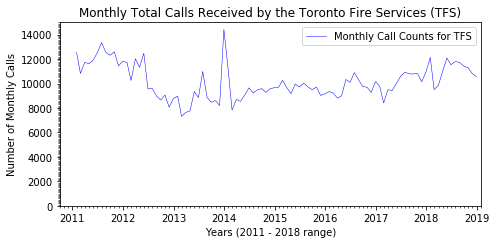

In [21]:
# visualize the resampled monthly count time series with matplotlib
fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

# get y lim
y_lim1 = 0
y_lim2 = math.ceil(df_DATETIME_MONTHLY["COUNT"].max() / 1000) * 1000

# get x lim
x_lim1 = datetime.datetime(year=2010, month=10, day=1)
x_lim2 = datetime.datetime(year=2019, month=2, day=1)

# plot the time series
axes.plot(df_DATETIME_MONTHLY.index,
          df_DATETIME_MONTHLY["COUNT"],
          color="blue",
          linewidth=0.5,
          label="Monthly Call Counts for TFS");

# set axis limits
axes.set_xlim(x_lim1, x_lim2)
axes.set_ylim(y_lim1, y_lim2)

# set minor ticks for x axis to be the months
months = mdates.MonthLocator()
axes.xaxis.set_minor_locator(months)

# set minor ticks for y axis to be values of 100
hundreds = tick.MultipleLocator(100)
axes.yaxis.set_minor_locator(hundreds)

# set title, x axis title and y axis title
axes.set_title("Monthly Total Calls Received by the Toronto Fire Services (TFS)")
axes.set_xlabel("Years (2011 - 2018 range)")
axes.set_ylabel("Number of Monthly Calls")

# plot a legend
plt.legend()

# magical padding
plt.tight_layout()

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "Monthly_Total_Calls_TFS.png"))

# The spike on Dec. 22, 2013 is kept as it cannot be ruled an outlier
# for monthly resampled data

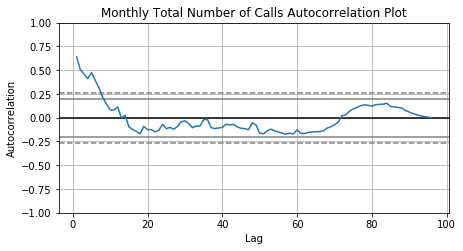

In [22]:
# lets get the autocorrelation plot to see if there is a relationship
# between successive days
fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

# get the y lim
y_lim1 = -1
y_lim2 = 1

# autocorrelation plot
pd.plotting.autocorrelation_plot(df_DATETIME_MONTHLY, ax=axes)

# set the x and y limits
axes.set_ylim(y_lim1, y_lim2)
axes.set_title("Monthly Total Number of Calls Autocorrelation Plot")

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "Monthly_Total_Calls_Autocorrelation.png"))

# autocorrelation is present for the first 7 months

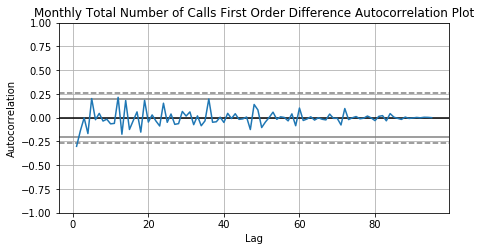

In [23]:
# lets take the first order difference to see if we can introduce
# stationarity to the time series
df_DATETIME_MONTHLY_DIFF = df_DATETIME_MONTHLY.diff(1).dropna()

# lets get the autocorrelation plot to see if there is a relationship
# for the first order difference
fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

# get the y lim
y_lim1 = -1
y_lim2 = 1

# autocorrelation plot
pd.plotting.autocorrelation_plot(df_DATETIME_MONTHLY_DIFF, ax=axes)

# set the y limits
axes.set_ylim(y_lim1, y_lim2)
axes.set_title("Monthly Total Number of Calls First Order Difference Autocorrelation Plot")

fig.savefig(os.path.join(IMAGES_DIRECTORY, "Monthly_Total_Calls_First_Order_Difference_Autocorrelation.png"))

# No autocorrelation for First Order Difference as it appears to be stationary

In [24]:
# delete the dataframes from memory
del df_DATETIME, df_DATETIME_DAILY, df_DATETIME_DAILY_DIFF, df_DATETIME_MONTHLY, df_DATETIME_MONTHLY_DIFF

# 6. The Effect of Toronto Weather / Climate on Toronto Fire Services Basic Incidents
- What role does Toronto Weather and Climate have on TFS Basic Incidents
    - Weather and Climate (Temperature, Rain, Precipitation, Snow levels)
    - Building Energy Demands (Heating Degree Day (HDD)<sup>[8]</sup> and Cooling Degree Day (CDD)<sup>[]</sup>)

In [25]:
# Grab the aggregate statistics for the top 10 "FINAL_TYPE" categories
top_10 = [x for x in df["FINAL_TYPE"].value_counts().index[:10]]

# generate groupby aggregate statistics
df_TEMP_GROUPBY = (df.loc[df["FINAL_TYPE"].isin(top_10), ["MEAN_TEMP", "FINAL_TYPE"]]
                     .groupby("FINAL_TYPE")
                     .agg(["mean", "std"])
                     .dropna()
                     .reset_index())

# rename columns
df_TEMP_GROUPBY.columns = ["FINAL_TYPE", "MEAN_TEMP", "STD_TEMP"]

# set the index
df_TEMP_GROUPBY.index = df_TEMP_GROUPBY["FINAL_TYPE"].apply(lambda x: x.split("-")[0].strip())
df_TEMP_GROUPBY.index.name = "CODE"

# save the DataFrame to a csv
df_TEMP_GROUPBY.to_csv(os.path.join(ANALYSES_DIRECTORY, "Top_10_Calls_and_Temperature.csv"))

df_TEMP_GROUPBY

,FINAL_TYPE,MEAN_TEMP,STD_TEMP
CODE,,,
22,22 - Pot on Stove (no fire),8.614496,10.297883
24,24 - Other Cooking/toasting/smoke/steam (No Fire),8.127894,10.340055
31,31 - Alarm Equipment - Malfunction,9.430449,11.431404
32,32 - Alarm System Equipment - Accidental activ...,9.102016,10.753833
33,"33 - Human - Malicious intent, prank",9.294252,10.336210
34,34 - Human - Perceived Emergency,9.279539,10.744743
35,35 - Human - Accidental (alarm accidentally ac...,8.996670,10.458059
62,62 - Vehicle Collision,9.985055,10.466382
66,66 - Persons Trapped in Elevator,10.338659,10.708309


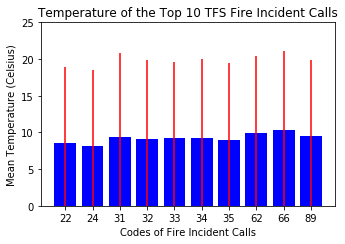

In [26]:
# Here is a bar plot to show the distribution of temperature for the top 10 calls
fig, axes = plt.subplots(1, 1, figsize=(5, 3.5))

# get y lim
y_lim1 = 0
y_lim2 = 25

# plot the time series
axes.bar(x=df_TEMP_GROUPBY.index,
          height=df_TEMP_GROUPBY["MEAN_TEMP"],
          yerr=df_TEMP_GROUPBY["STD_TEMP"],
          color="blue",
          ecolor="red")

# set axis limits
axes.set_ylim(y_lim1, y_lim2)

# set title, x axis title and y axis title
axes.set_title("Temperature of the Top 10 TFS Fire Incident Calls")
axes.set_xlabel("Codes of Fire Incident Calls")
axes.set_ylabel("Mean Temperature (Celsius)")

# magical padding
plt.tight_layout()

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "Top_10_Calls_and_Temperature.png"))

# As you can see from the standard deviation the temperatures are all over the place
# No relationship can be gleamed

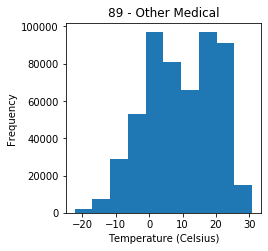

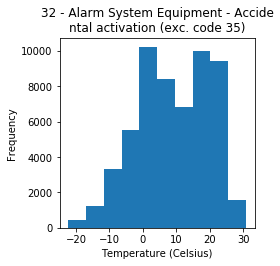

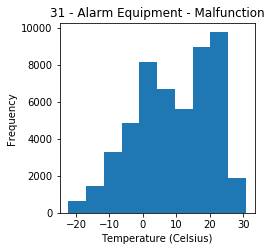

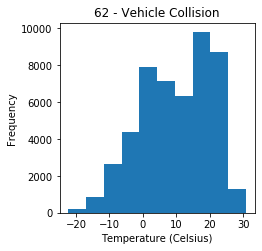

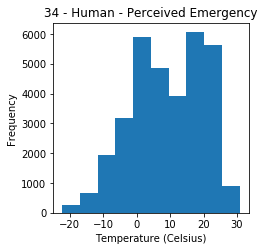

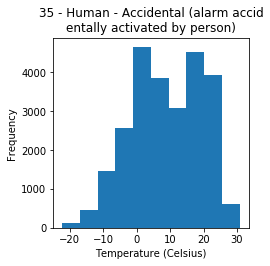

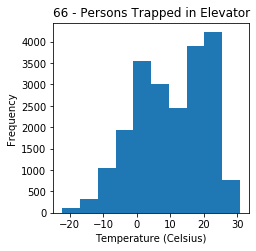

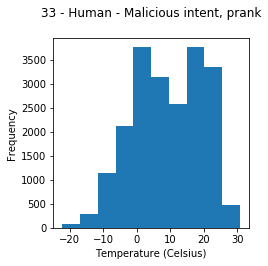

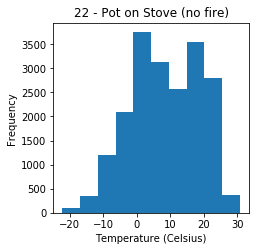

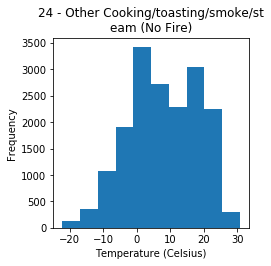

In [27]:
# A series of Histograms for the Top 10 TFS Fire Incident Calls
for x in top_10:
    fig, axes = plt.subplots(1, 1, figsize=(3.5, 3.5))
    axes.hist(df.loc[df["FINAL_TYPE"] == x, "MEAN_TEMP"])
    axes.set_title(re.sub("(.{36})", "\\1\n", x, 0, re.DOTALL))
    axes.set_xlabel("Temperature (Celsius)")
    axes.set_ylabel("Frequency")
    # save the figure without any punctuation or whitespace
    fig.savefig(os.path.join(
        IMAGES_DIRECTORY,
        f"""{x.translate(str.maketrans('', '', string.punctuation)).replace(" ", "")}.png"""));

In [28]:
# Frequency of incidents to specific temperature ranges

# get max and min temperature
maximum_temp = df["MAX_TEMP"].max()
minimum_temp = df["MAX_TEMP"].min()

# get ceiling and floor
max_ceil = math.ceil(maximum_temp/10)*10
min_floor = math.floor(minimum_temp/10)*10

# generate cutting locations and labels
step=20
temp_range = list(np.arange(min_floor, max_ceil+1, step))
labels = [f"{value} to {temp_range[index+1]}" for (index, value) in enumerate(temp_range[:-1])]

# create column with Bins
df["MEAN_TEMP_BINS"] = pd.cut(df["MEAN_TEMP"],
                                    bins=temp_range,
                                    labels=labels)

# frequency of incidents corresponding to temperatures
df_MEAN_INCIDENTS = (df[["CAD_TYPE", "MEAN_TEMP_BINS"]]
                     .groupby("MEAN_TEMP_BINS")
                     .count()
                     .rename(columns={"CAD_TYPE":"Number of Incidents"}))
df_MEAN_INCIDENTS.index.name = "Mean Temperature (Celsius) Bins"

# save the dataframe
df_MEAN_INCIDENTS.to_csv(os.path.join(ANALYSES_DIRECTORY, "Temperature_Bins_and_TFS_Incidents.csv"))

df_MEAN_INCIDENTS

,Number of Incidents
Mean Temperature (Celsius) Bins,
-20 to 0,199373
0 to 20,571161
20 to 40,203581


In [29]:
# delete the variables and drop the Temperature Bin
del df_TEMP_GROUPBY
df.drop(columns="MEAN_TEMP_BINS", inplace=True)

### Temperature varies widely among top 10 incident types
### Frequency distribution for Incidents peaks at a temperature range of 0 to 20
### In Conclusion I do not believe temperature plase an important role in predicting the type of incident TFS responds to

## Heating Degree Day (HDD) and Cooling Degree Day (CDD)

In [30]:
# bin the HDD and CDD data

# get the max and min for HDD and CDD
max_HDD = df["HDD"].max(); min_HDD = df["HDD"].min(); max_CDD = df["CDD"].max(); min_CDD = df["CDD"].min()

# get ceiling and floor
max_ceil_HDD = math.ceil(max_HDD/10)*10; min_floor_HDD = math.floor(min_HDD/10)*10;
max_ceil_CDD = math.ceil(max_CDD/10)*10; min_floor_CDD = math.floor(min_CDD/10)*10;

# generate HDD and CDD range
step_HDD=5
step_CDD=2
HDD_range = list(np.arange(min_floor_HDD, max_ceil_HDD+1, step_HDD))
CDD_range = list(np.arange(min_floor_CDD, max_ceil_CDD+1, step_CDD))

# get the HDD and CDD labels
labels_HDD = [f"{value} to {HDD_range[index+1]}" for (index, value) in enumerate(HDD_range[:-1])]
labels_CDD = [f"{value} to {CDD_range[index+1]}" for (index, value) in enumerate(CDD_range[:-1])]

# set the bin labels to the dataframe
df["HDD_BINS"] = pd.cut(df["HDD"], bins= HDD_range, right = False, labels= labels_HDD)
df["CDD_BINS"] = pd.cut(df["CDD"], bins= CDD_range, right = False, labels= labels_CDD)

df.head()

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,...,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM,HDD_BINS,CDD_BINS
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342.0,342.0,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),...,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,10 to 15,0 to 2
F11000011,2011-01-01 00:03:55,5.117,6.183,131.0,131.0,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),...,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,10 to 15,0 to 2
F11000012,2011-01-01 00:05:03,4.517,17.617,324.0,324.0,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),...,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,10 to 15,0 to 2
F11000013,2011-01-01 00:04:46,6.000,9.883,345.0,345.0,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),...,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,10 to 15,0 to 2
F11000014,2011-01-01 00:06:07,4.933,10.133,142.0,142.0,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),...,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,10 to 15,0 to 2


In [31]:
# GroupBy count for HDD and CDD and save to csv
df_HDD_GROUPBY = df[["HDD_BINS", "CAD_TYPE"]].groupby("HDD_BINS").count().rename(columns={"CAD_TYPE":"COUNT"})
df_CDD_GROUPBY = df[["CDD_BINS", "CAD_TYPE"]].groupby("CDD_BINS").count().rename(columns={"CAD_TYPE":"COUNT"})

# save to csv
df_HDD_GROUPBY.to_csv(os.path.join(ANALYSES_DIRECTORY, "TFS_Fire_Incidents_HDD.csv"))
df_CDD_GROUPBY.to_csv(os.path.join(ANALYSES_DIRECTORY, "TFS_Fire_Incidents_CDD.csv"))

display(df_HDD_GROUPBY)
display(df_CDD_GROUPBY)

,COUNT
HDD_BINS,
0 to 5,418491
5 to 10,116668
10 to 15,140302
15 to 20,151270
20 to 25,81979
25 to 30,47630
30 to 35,13517
35 to 40,4755
40 to 45,549


,COUNT
CDD_BINS,
0 to 2,768515
2 to 4,79011
4 to 6,68860
6 to 8,40064
8 to 10,15947
10 to 12,1551
12 to 14,1213
14 to 16,0
16 to 18,0


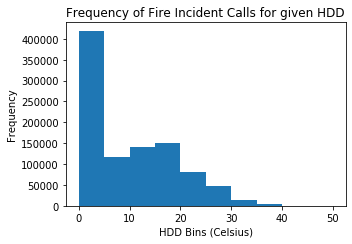

In [32]:
# Here is a histogram of HDD and CDD
fig, axes = plt.subplots(1, 1, figsize=(5, 3.5))

# plot the time series
axes.hist("HDD", HDD_range, data=df)

# set title, x axis title and y axis title
axes.set_title("Frequency of Fire Incident Calls for given HDD")
axes.set_xlabel("HDD Bins (Celsius)")
axes.set_ylabel("Frequency")

# magical padding
plt.tight_layout()

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "TFS_Fire_Incidents_HDD.png"))

# A good majority occur on days with minimial to no heating requirements

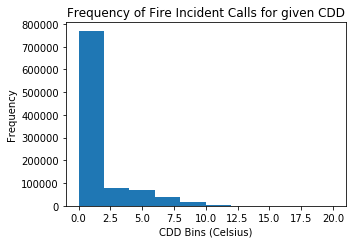

In [33]:
# Here is a histogram of HDD and CDD
fig, axes = plt.subplots(1, 1, figsize=(5, 3.5))

# plot the time series
axes.hist("CDD", CDD_range, data=df)

# set title, x axis title and y axis title
axes.set_title("Frequency of Fire Incident Calls for given CDD")
axes.set_xlabel("CDD Bins (Celsius)")
axes.set_ylabel("Frequency")

# magical padding
plt.tight_layout()

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "TFS_Fire_Incidents_CDD.png"))

# A good majority occur on days with minimial to no heating requirements

In [34]:
# check data by month of year to see if HDD and CDD have no effect
df_HDD_CROSSTAB = pd.crosstab(df["DATETIME"].dt.month, df["HDD_BINS"], df["DATETIME"].dt.month, aggfunc="count")
df_HDD_CROSSTAB.index.name = "MONTH"

# write to csv
df_HDD_CROSSTAB.to_csv(os.path.join(ANALYSES_DIRECTORY, "HDD_Month_Crosstab.csv"))

df_HDD_CROSSTAB

HDD_BINS,0 to 5,5 to 10,10 to 15,15 to 20,20 to 25,25 to 30,30 to 35,35 to 40,40 to 45
MONTH,,,,,,,,,
1,NaN,884.0,8730.0,25037.0,23765.0,16922.0,7458.0,2493.0,NaN
2,NaN,1339.0,8863.0,23779.0,15860.0,18095.0,3342.0,1798.0,549.0
3,2452.0,5662.0,18160.0,27780.0,17822.0,5119.0,910.0,NaN,NaN
4,4945.0,24156.0,33658.0,13558.0,1525.0,NaN,NaN,NaN,NaN
5,56594.0,25049.0,3511.0,NaN,NaN,NaN,NaN,NaN,NaN
6,81631.0,877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,86818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,82421.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,72558.0,7928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


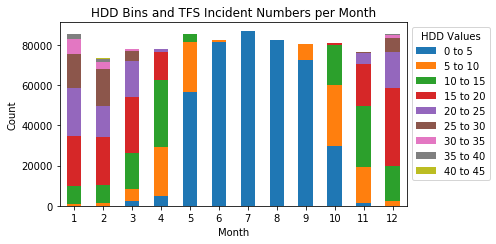

In [35]:
# HDD Crosstab
fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

# plot the HDD Crosstab
df_HDD_CROSSTAB.plot(kind="bar", stacked=True, rot=0, ax=axes)
axes.set_ylabel("Count")
axes.set_xlabel("Month")
axes.set_title("HDD Bins and TFS Incident Numbers per Month")
axes.legend(title="HDD Values",bbox_to_anchor=(1, 1))
plt.tight_layout()
# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "HDD_Month_Crosstab.png"))

In [36]:
# check data by month of year to see if HDD and CDD have no effect
df_CDD_CROSSTAB = pd.crosstab(df["DATETIME"].dt.month, df["CDD_BINS"], df["DATETIME"].dt.month, aggfunc="count")
df_CDD_CROSSTAB.index.name = "MONTH"

# write to csv
df_CDD_CROSSTAB.to_csv(os.path.join(ANALYSES_DIRECTORY, "CDD_Month_Crosstab.csv"))

df_CDD_CROSSTAB

CDD_BINS,0 to 2,2 to 4,4 to 6,6 to 8,8 to 10,10 to 12,12 to 14
MONTH,,,,,,,
1,85289.0,NaN,NaN,NaN,NaN,NaN,NaN
2,73625.0,NaN,NaN,NaN,NaN,NaN,NaN
3,77905.0,NaN,NaN,NaN,NaN,NaN,NaN
4,77842.0,NaN,NaN,NaN,NaN,NaN,NaN
5,71479.0,8487.0,3958.0,1230.0,NaN,NaN,NaN
6,50276.0,16282.0,9108.0,4464.0,2378.0,NaN,NaN
7,16143.0,19071.0,23367.0,18213.0,7644.0,1551.0,829.0
8,22444.0,21123.0,23176.0,11270.0,4024.0,NaN,384.0
9,52196.0,12251.0,9251.0,4887.0,1901.0,NaN,NaN


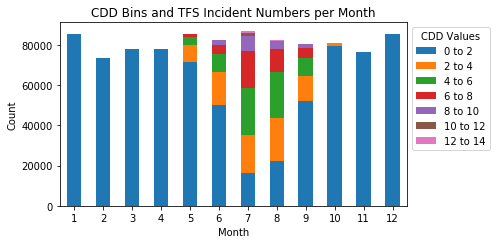

In [37]:
# CDD Crosstab
fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

# plot the CDD Crosstab
df_CDD_CROSSTAB.plot(kind="bar", stacked=True, rot=0, ax=axes)
axes.set_ylabel("Count")
axes.set_xlabel("Month")
axes.set_title("CDD Bins and TFS Incident Numbers per Month")
axes.legend(title="CDD Values",bbox_to_anchor=(1, 1))
plt.tight_layout()
# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "CDD_Month_Crosstab.png"))

In [38]:
# delete and drop variables / columns
del df_CDD_CROSSTAB, df_HDD_CROSSTAB, df_HDD_GROUPBY, df_CDD_GROUPBY
df.drop(columns=["HDD_BINS", "CDD_BINS"], inplace=True)

### There is no discerning trend to show a relationship between HDD or CDD and number of TFS emergency calls over the months

## Rain and Snow

In [39]:
# bin the rain and snow data

# get the max and min for HDD and CDD
max_rain = df["RAIN_MM"].max(); min_rain = df["RAIN_MM"].min(); max_snow = df["SNOW_CM"].max(); min_snow = df["SNOW_CM"].min()

# get ceiling and floor
max_ceil_rain = math.ceil(max_rain/10)*10; min_floor_rain = math.floor(min_rain/10)*10;
max_ceil_snow = math.ceil(max_snow/10)*10; min_floor_snow = math.floor(min_snow/10)*10;

# generate HDD and CDD range
step_rain=5
step_snow=5
rain_range = list(np.arange(min_floor_rain, max_ceil_rain+1, step_rain))
snow_range = list(np.arange(min_floor_snow, max_ceil_snow+1, step_snow))

# get the HDD and CDD labels
labels_rain = [f"{value} to {rain_range[index+1]}" for (index, value) in enumerate(rain_range[:-1])]
labels_snow = [f"{value} to {snow_range[index+1]}" for (index, value) in enumerate(snow_range[:-1])]

# set the bin labels to the dataframe
df["RAIN_BINS"] = pd.cut(df["RAIN_MM"], bins= rain_range, right = False, labels= labels_rain)
df["SNOW_BINS"] = pd.cut(df["SNOW_CM"], bins= snow_range, right = False, labels= labels_snow)

df.head()

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,...,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM,RAIN_BINS,SNOW_BINS
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342.0,342.0,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),...,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,0 to 5,0 to 5
F11000011,2011-01-01 00:03:55,5.117,6.183,131.0,131.0,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),...,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,0 to 5,0 to 5
F11000012,2011-01-01 00:05:03,4.517,17.617,324.0,324.0,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),...,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,0 to 5,0 to 5
F11000013,2011-01-01 00:04:46,6.000,9.883,345.0,345.0,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),...,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,0 to 5,0 to 5
F11000014,2011-01-01 00:06:07,4.933,10.133,142.0,142.0,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),...,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,0 to 5,0 to 5


In [40]:
# GroupBy count for HDD and CDD and save to csv
df_RAIN_GROUPBY = df[["RAIN_BINS", "CAD_TYPE"]].groupby("RAIN_BINS").count().rename(columns={"CAD_TYPE":"COUNT"})
df_SNOW_GROUPBY = df[["SNOW_BINS", "CAD_TYPE"]].groupby("SNOW_BINS").count().rename(columns={"CAD_TYPE":"COUNT"})

# save to csv
df_RAIN_GROUPBY.to_csv(os.path.join(ANALYSES_DIRECTORY, "TFS_Fire_Incidents_RAIN.csv"))
df_SNOW_GROUPBY.to_csv(os.path.join(ANALYSES_DIRECTORY, "TFS_Fire_Incidents_SNOW.csv"))

display(df_RAIN_GROUPBY)
display(df_SNOW_GROUPBY)

,COUNT
RAIN_BINS,
0 to 5,900145
5 to 10,50882
10 to 15,11117
15 to 20,8120
20 to 25,908
25 to 30,1975
30 to 35,1710
35 to 40,0
40 to 45,304


,COUNT
SNOW_BINS,
0 to 5,857011
5 to 10,42625
10 to 15,45685
15 to 20,16727
20 to 25,6070
25 to 30,5125
30 to 35,1650
35 to 40,0


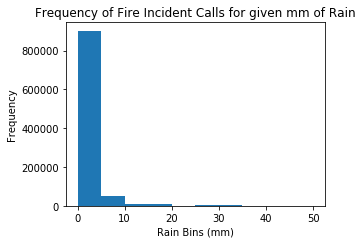

In [41]:
# Here is a histogram of HDD and CDD
fig, axes = plt.subplots(1, 1, figsize=(5, 3.5))

# plot the time series
axes.hist("RAIN_MM", rain_range, data=df)

# set title, x axis title and y axis title
axes.set_title("Frequency of Fire Incident Calls for given mm of Rain")
axes.set_xlabel("Rain Bins (mm)")
axes.set_ylabel("Frequency")

# magical padding
plt.tight_layout()

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "TFS_Fire_Incidents_Rain.png"))

# A good majority occur on days with no rain

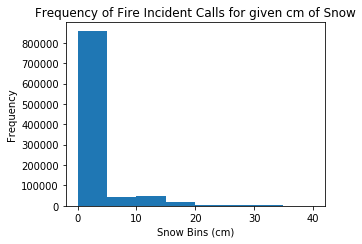

In [42]:
# Here is a histogram of HDD and CDD
fig, axes = plt.subplots(1, 1, figsize=(5, 3.5))

# plot the time series
axes.hist("SNOW_CM", snow_range, data=df)

# set title, x axis title and y axis title
axes.set_title("Frequency of Fire Incident Calls for given cm of Snow")
axes.set_xlabel("Snow Bins (cm)")
axes.set_ylabel("Frequency")

# magical padding
plt.tight_layout()

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "TFS_Fire_Incidents_Snow.png"))

# A good majority occur on days with no snow on the ground

In [43]:
# check data by month of year to see if rain or snow have an effect
df_RAIN_CROSSTAB = pd.crosstab(df["DATETIME"].dt.month, df["RAIN_BINS"], df["DATETIME"].dt.month, aggfunc="count")
df_RAIN_CROSSTAB.index.name = "MONTH"

# write to csv
df_RAIN_CROSSTAB.to_csv(os.path.join(ANALYSES_DIRECTORY, "RAIN_Month_Crosstab.csv"))

df_RAIN_CROSSTAB

RAIN_BINS,0 to 5,5 to 10,10 to 15,15 to 20,20 to 25,25 to 30,30 to 35,40 to 45
MONTH,,,,,,,,
1,82282.0,2755.0,252.0,NaN,NaN,NaN,NaN,NaN
2,70996.0,2038.0,591.0,NaN,NaN,NaN,NaN,NaN
3,74789.0,2690.0,426.0,NaN,NaN,NaN,NaN,NaN
4,67761.0,8149.0,1932.0,NaN,NaN,NaN,NaN,NaN
5,78881.0,4630.0,369.0,679.0,NaN,595.0,NaN,NaN
6,74027.0,3661.0,1211.0,2912.0,330.0,NaN,367.0,NaN
7,79123.0,3586.0,1003.0,827.0,578.0,385.0,1012.0,304.0
8,71554.0,7178.0,1873.0,817.0,NaN,668.0,331.0,NaN
9,72098.0,5767.0,1218.0,1076.0,NaN,327.0,NaN,NaN


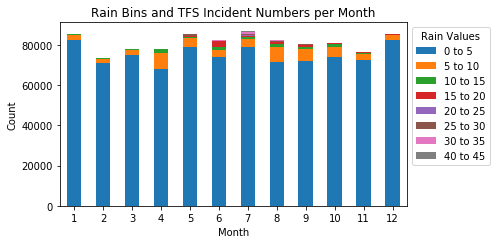

In [44]:
# Rain Crosstab
fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

# plot the Rain Crosstab
df_RAIN_CROSSTAB.plot(kind="bar", stacked=True, rot=0, ax=axes)
axes.set_ylabel("Count")
axes.set_xlabel("Month")
axes.set_title("Rain Bins and TFS Incident Numbers per Month")
axes.legend(title="Rain Values",bbox_to_anchor=(1, 1))
plt.tight_layout()
# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "Rain_Month_Crosstab.png"))

In [45]:
# check data by month of year to see if rain or snow have an effect
df_SNOW_CROSSTAB = pd.crosstab(df["DATETIME"].dt.month, df["SNOW_BINS"], df["DATETIME"].dt.month, aggfunc="count")
df_SNOW_CROSSTAB.index.name = "MONTH"

# write to csv
df_SNOW_CROSSTAB.to_csv(os.path.join(ANALYSES_DIRECTORY, "SNOW_Month_Crosstab.csv"))

df_SNOW_CROSSTAB

SNOW_BINS,0 to 5,5 to 10,10 to 15,15 to 20,20 to 25,25 to 30,30 to 35
MONTH,,,,,,,
1,53165.0,16217.0,11178.0,4729.0,NaN,NaN,NaN
2,33492.0,6921.0,18330.0,5946.0,3941.0,3077.0,1650.0
3,60522.0,4484.0,7150.0,2291.0,1410.0,2048.0,NaN
4,76228.0,1614.0,NaN,NaN,NaN,NaN,NaN
5,85154.0,NaN,NaN,NaN,NaN,NaN,NaN
6,82508.0,NaN,NaN,NaN,NaN,NaN,NaN
7,86818.0,NaN,NaN,NaN,NaN,NaN,NaN
8,82421.0,NaN,NaN,NaN,NaN,NaN,NaN
9,80486.0,NaN,NaN,NaN,NaN,NaN,NaN


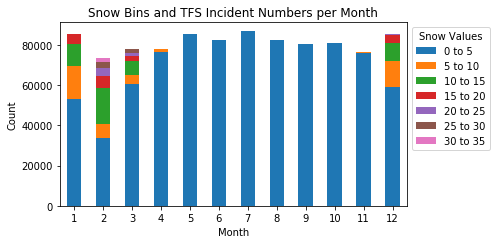

In [46]:
# Snow Crosstab
fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

# plot the Snow Crosstab
df_SNOW_CROSSTAB.plot(kind="bar", stacked=True, rot=0, ax=axes)
axes.set_ylabel("Count")
axes.set_xlabel("Month")
axes.set_title("Snow Bins and TFS Incident Numbers per Month")
axes.legend(title="Snow Values",bbox_to_anchor=(1, 1))
plt.tight_layout()
# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "Snow_Month_Crosstab.png"))

In [47]:
# drop columns and delete crosstab dataframes
del df_RAIN_CROSSTAB, df_SNOW_CROSSTAB, df_RAIN_GROUPBY, df_SNOW_GROUPBY
df.drop(columns=["RAIN_BINS", "SNOW_BINS"], inplace=True)

### Snow and Rain have no real impact on TFS Fire Incidents

# 7. The effect if Time and Day of the Week on TFS Fire Incidents
- do specific days of the week or times of the day affect the number of TFS Fire Incidents

In [48]:
# get the name of the week and add it to the DataFrame
df["WEEK_DAY"] = df["DATETIME"].dt.day_name()

# get the code for FINAL_TYPE and add it to the DataFrame
df["FINAL_TYPE_CODE"] = df["FINAL_TYPE"].apply(lambda x: int(x.split("-")[0].strip()))

# slice the dataframe for only the top 10 FINAL_TYPE by count, remove all nulls as well
top_10 = [x for x in df["FINAL_TYPE"].value_counts().index[:10]]
df_TOP_10 = df.loc[df["FINAL_TYPE"].isin(top_10), ["DATETIME",
                                                   "WEEK_DAY",
                                                   "FINAL_TYPE",
                                                   "FINAL_TYPE_CODE"]].copy().dropna()

# generate a cross tab of the probability of the top 10 calls occurring
DAY_OF_WEEK_CROSSTAB = pd.crosstab(df_TOP_10["WEEK_DAY"],
                                   [df_TOP_10["FINAL_TYPE_CODE"]],
                                   rownames=["Day of the Week"], colnames=["Final Type Code"])

# generate percentage chance of it occurring
DAY_OF_WEEK_CROSSTAB_PERCENT = DAY_OF_WEEK_CROSSTAB.div(DAY_OF_WEEK_CROSSTAB.sum()).applymap(lambda x: "{:.0%}".format(x))

# write to csv
DAY_OF_WEEK_CROSSTAB_PERCENT.to_csv(os.path.join(ANALYSES_DIRECTORY, "Day_Of_Week_Crosstab.csv"))

DAY_OF_WEEK_CROSSTAB_PERCENT

Final Type Code,22,24,31,32,33,34,35,62,66,89
Day of the Week,,,,,,,,,,
Friday,14%,14%,14%,15%,15%,15%,16%,16%,14%,15%
Monday,13%,14%,15%,15%,13%,15%,15%,13%,13%,14%
Saturday,16%,16%,14%,12%,17%,15%,12%,14%,18%,14%
Sunday,17%,16%,14%,10%,16%,14%,10%,13%,16%,14%
Thursday,13%,14%,14%,16%,13%,14%,16%,15%,12%,14%
Tuesday,13%,13%,15%,16%,13%,14%,16%,15%,13%,14%
Wednesday,14%,13%,14%,16%,13%,14%,16%,14%,13%,14%


In [49]:
# generate a cross tab of the probability of the top 10 calls occurring
MONTH_CROSSTAB = pd.crosstab(df_TOP_10["DATETIME"].dt.month_name(),
                                   [df_TOP_10["FINAL_TYPE_CODE"]],
                                   rownames=["Month of Year"], colnames=["Final Type Code"])

# generate percentage chance of it occurring
MONTH_CROSSTAB_PERCENT = MONTH_CROSSTAB.div(MONTH_CROSSTAB.sum()).applymap(lambda x: "{:.0%}".format(x))

# reorder rows
MONTH_CROSSTAB_PERCENT = MONTH_CROSSTAB_PERCENT.loc[["January", "February", "March", "April",
                                                     "May", "June", "July", "August",
                                                     "September", "October", "November", "December"], :]

# write to csv
MONTH_CROSSTAB_PERCENT.to_csv(os.path.join(ANALYSES_DIRECTORY, "Month_Crosstab.csv"))

MONTH_CROSSTAB_PERCENT

Final Type Code,22,24,31,32,33,34,35,62,66,89
Month of Year,,,,,,,,,,
January,9%,9%,10%,9%,8%,9%,9%,7%,7%,9%
February,8%,8%,8%,8%,8%,7%,8%,7%,7%,8%
March,9%,8%,7%,8%,8%,8%,9%,7%,8%,8%
April,8%,8%,7%,8%,8%,8%,8%,7%,7%,8%
May,8%,9%,8%,8%,9%,8%,8%,8%,8%,9%
June,8%,7%,8%,8%,9%,8%,8%,9%,9%,8%
July,7%,6%,10%,9%,8%,9%,8%,9%,11%,9%
August,7%,7%,9%,8%,8%,8%,8%,9%,9%,8%
September,8%,8%,9%,8%,8%,8%,8%,9%,8%,8%


In [50]:
# generate a cross tab of the probability of the top 10 calls occurring
HOUR_CROSSTAB = pd.crosstab(df_TOP_10["DATETIME"].dt.round("H").dt.hour,
                                   [df_TOP_10["FINAL_TYPE_CODE"]],
                                   rownames=["Hour of the Day"], colnames=["Final Type Code"])

# generate percentage chance of it occurring
HOUR_CROSSTAB_PERCENT_PLOT = HOUR_CROSSTAB.div(HOUR_CROSSTAB.sum()).multiply(100)
HOUR_CROSSTAB_PERCENT = HOUR_CROSSTAB_PERCENT_PLOT.copy().applymap(lambda x: "{:.0%}".format(x/100))

# write to csv
HOUR_CROSSTAB_PERCENT.to_csv(os.path.join(ANALYSES_DIRECTORY, "Hours_Crosstab.csv"))

HOUR_CROSSTAB_PERCENT

Final Type Code,22,24,31,32,33,34,35,62,66,89
Hour of the Day,,,,,,,,,,
0,3%,2%,4%,2%,5%,4%,2%,2%,3%,4%
1,2%,2%,4%,2%,5%,3%,2%,2%,2%,3%
2,2%,1%,4%,2%,4%,2%,1%,1%,2%,3%
3,2%,1%,4%,2%,4%,2%,1%,2%,1%,3%
4,1%,1%,4%,1%,3%,2%,1%,1%,1%,2%
5,1%,1%,3%,1%,3%,1%,1%,1%,1%,2%
6,1%,1%,4%,2%,2%,2%,1%,2%,1%,2%
7,2%,2%,4%,3%,2%,2%,2%,4%,2%,3%
8,2%,3%,4%,4%,2%,3%,3%,5%,3%,4%


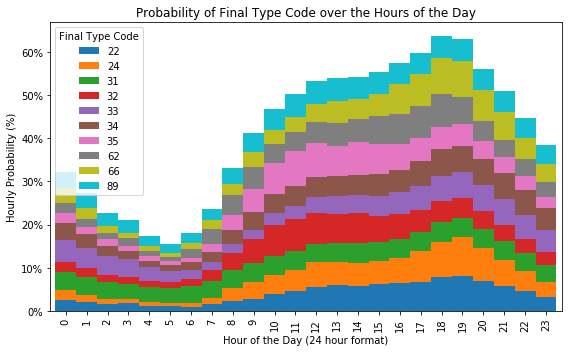

In [51]:
# visualize the resampled daily count time series with matplotlib
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

# plot cross tabulation
HOUR_CROSSTAB_PERCENT_PLOT.plot(kind="bar",
                                legend=True,
                                stacked=True,
                                align="center",
                                ax=axes, width=1)

# set y axis formatting to percentage
axes.yaxis.set_major_formatter(tick.PercentFormatter())

# set the x and y axis labels
axes.set_xlabel("Hour of the Day (24 hour format)")
axes.set_ylabel("Hourly Probability (%)")

# set the main title
axes.set_title("Probability of Final Type Code over the Hours of the Day");

# magic
plt.tight_layout()

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "Hours_of_Day_Probability.png"))

In [52]:
df.columns

Index(['DATETIME', 'MINUTES_ARRIVAL', 'MINUTES_LEAVE', 'FIRE_STATION',
       'FIRE_STATION_CLOSEST', 'NAME', 'ADDRESS', 'LATITUDE_STATION',
       'LONGITUDE_STATION', 'WARD_NAME', 'MUN_NAME', 'CAD_TYPE',
       'CAD_CALL_TYPE', 'FINAL_TYPE', 'ALARM_LEVEL', 'CALL_SOURCE',
       'PERSONS_RESCUED', 'LATITUDE', 'LONGITUDE', 'MAX_TEMP', 'MIN_TEMP',
       'MEAN_TEMP', 'HDD', 'CDD', 'RAIN_MM', 'PRECIP_MM', 'SNOW_CM',
       'WEEK_DAY', 'FINAL_TYPE_CODE'],
      dtype='object')

In [53]:
# delete DataFrames and drop columns
del HOUR_CROSSTAB_PERCENT, HOUR_CROSSTAB_PERCENT_PLOT, HOUR_CROSSTAB, MONTH_CROSSTAB, MONTH_CROSSTAB_PERCENT, DAY_OF_WEEK_CROSSTAB, DAY_OF_WEEK_CROSSTAB_PERCENT
df.drop(columns=["WEEK_DAY", "FINAL_TYPE_CODE"], inplace=True)

## For Final Incident Type per month there are no obvious outliers.  Regardless of month the probability of receiving each incident type is relatively the same
## For Final Incident Type per day of the week there are no obvious outliers.  Regardless of day of the week the probability of receiving each incident type is relatively the same
## For Final Incident Type per hour of the day there is a clear trend.  Most of the Final incident Types increase in frequency after about 8 AM (8) until about 10 PM (22)
    - Exemptions to this are call type codes 31 and 33.
    - Calls with code 31 (Alarm Equipment - Malfunction) are consistent and frequent throughout the day.
    - Calls of type code 33 (Human - Malicious intent, prank) are least frequent occurring from 5 AM (5) to 9 AM (9)

# 8. Source of Calls and its effect on TFS Fire Incidents
- Does the source of the call indicate the Final Incident type of the TFS Fire incident

In [54]:
# get the code for FINAL_TYPE and CALL_SOURCE and add it to the DataFrame
df["FINAL_TYPE_CODE"] = df["FINAL_TYPE"].apply(lambda x: int(x.split("-")[0].strip()))
df["CALL_SOURCE_CODE"] = df["CALL_SOURCE"].apply(lambda x: int(x.split("-")[0].strip()))

# slice the dataframe for only the top 10 FINAL_TYPE by count, remove all nulls as well
top_10 = [x for x in df["FINAL_TYPE"].value_counts().index[:10]]
df_TOP_10 = df.loc[df["FINAL_TYPE"].isin(top_10), :].copy().dropna()

# create cross tabulation of CALL_SOURCE_CODE AND FINAL_TYPE_CODE
CALL_CROSSTAB_PLOT = pd.crosstab(df_TOP_10["CALL_SOURCE_CODE"], df_TOP_10["FINAL_TYPE_CODE"], normalize="columns")
CALL_CROSSTAB = CALL_CROSSTAB_PLOT.copy().applymap(lambda x: "{:.0%}".format(x))

# write to csv
CALL_CROSSTAB.to_csv(os.path.join(ANALYSES_DIRECTORY, "Call_Source_Probability.csv"))

CALL_CROSSTAB

FINAL_TYPE_CODE,22,24,31,32,33,34,35,62,66,89
CALL_SOURCE_CODE,,,,,,,,,,
1,39%,29%,19%,14%,20%,70%,14%,13%,85%,6%
2,2%,3%,2%,1%,1%,9%,1%,1%,5%,1%
3,0%,0%,0%,0%,0%,3%,0%,65%,2%,91%
4,1%,1%,1%,0%,1%,6%,0%,14%,2%,0%
5,58%,67%,78%,84%,77%,10%,84%,0%,6%,1%
6,0%,0%,0%,0%,0%,0%,0%,1%,0%,0%
7,0%,0%,0%,0%,0%,1%,0%,1%,0%,0%
8,0%,0%,0%,0%,0%,0%,0%,3%,0%,0%
9,0%,0%,0%,0%,0%,1%,0%,1%,0%,0%


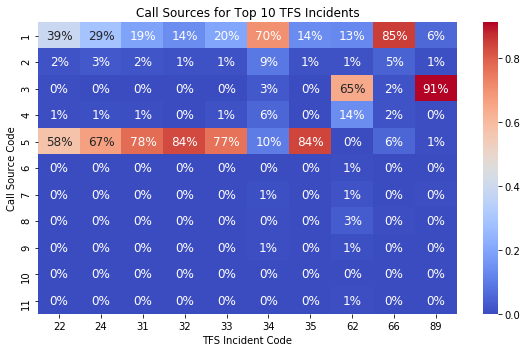

In [55]:
# visualize the resampled daily count time series with matplotlib
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

# plot heatmap
sns.heatmap(CALL_CROSSTAB_PLOT, cmap="coolwarm", annot=True, fmt=".0%", annot_kws={"size":12}, cbar=True, ax=axes)

# save titles
axes.set_title("Call Sources for Top 10 TFS Incidents")
axes.set_xlabel("TFS Incident Code")
axes.set_ylabel("Call Source Code")

# magic
plt.tight_layout()

# save the figure
fig.savefig(os.path.join(IMAGES_DIRECTORY, "Call_Source_Probability.png"))

In [56]:
# delete variables and drop columns
del df_TOP_10
df.drop(columns=["FINAL_TYPE_CODE", "CALL_SOURCE_CODE"], inplace=True)

### Calls of code 66 (Persons Trapped in Elevator) are mainly from 911 calls at 90% and the remainder are from a Telphone call from a Monitoring Agency
### Calls of code 89 (Other Medical) are 90% from an ambulance and the remaining are from 911.

# 9. Jupyter Notebook References

[1] "Python Documentation."  *Python Software Foundation*.  [Online](https://docs.python.org/).  [Accessed August 04, 2020]

[2] G. Niemeyer.  "dateutil - powerful extensions to datetime."  *dateutil*.  [Online](https://github.com/dateutil/dateutil).  [Accessed August 04, 2020]

[3] "pandas."  *PyData*.  [Online](https://pandas.pydata.org/).  [Accessed August 04, 2020]

[4] "NumPy - The fundamental package for scientific computing with Python."  *NumPy*.  [Online](https://numpy.org/).  [Accessed August 04, 2020]

[5] "Matplotlib:  Visualization with Python."  *The Matplotlib Development team*.  [Online](https://matplotlib.org/).  [Accessed August 04, 2020]

[6] M. Waskom.  "seaborn:  statistical data visualization."  *seaborn*.  [Online](https://seaborn.pydata.org/).  [Accessed August 04, 2020]

[7] "Toronto ice storm 2013: Photos show city looking like crime scene with taped-off downed branches."  *National Post*. December 23, 2013. [Online](https://nationalpost.com/news/canada/toronto-ice-storm-2013-photos-from-the-gtas-winter-nightmare).  [Accessed August 04, 2020]

[8] "Heating degree day." *Wikipedia*.  [Online](https://en.wikipedia.org/wiki/Heating_degree_day).  [Accessed August 04, 2020]